In [1]:
using CovidSim

In [2]:
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#110"{CovidSim.var"#scase#109#111"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [4]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.3), tf=(.18,.45))

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [5]:
# working with specific locale
locale = 53033

53033

In [7]:
alldict, env, series = run_a_sim(180,locale, showr0=false, 
       dtfilename="../parameters/dec_tree_all_25.csv",
       silent=true,spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


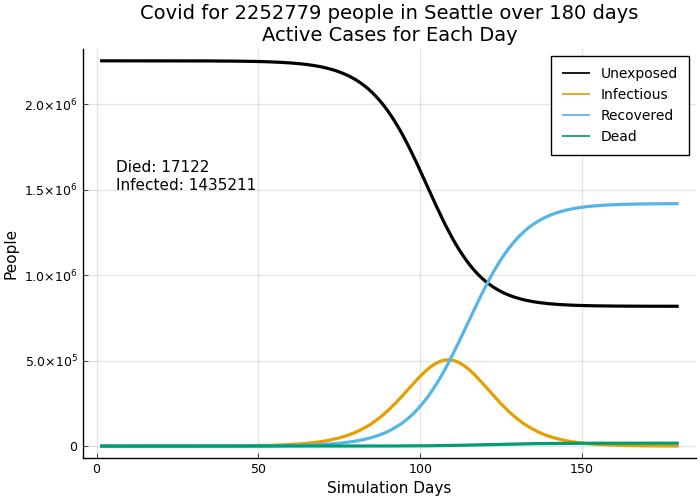

In [8]:
cumplot(series,locale,geo=alldict["geo"])

In [9]:
infection_outcome(series,locale)

(infect_pop = 0.6373021161031316, death_pct = 0.011925914729918639, death_pop = 0.007600410693842655)

#### Death Percentage Across Age Groups

In [10]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[locale][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
death_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      61  0.004
 "20-40"    335  0.02
 "40-60"   1708  0.1
 "60-80"   5873  0.343
 "80+"     9145  0.534
 "Total"  17122  1.0

#### Death Percentage of Infected *Within* Each Age Group

In [46]:
dead = series[locale][:cum][end, map2series.dead] 
infected = series[locale][:cum][1,map2series.unexposed] .- series[locale][:cum][end,map2series.unexposed]
death_pct_infected_within_age = round.(dead ./ infected, digits=5)
hcat(agelabels, death_pct_infected_within_age)

6×2 Array{Any,2}:
 "0-20"   0.00039
 "20-40"  0.00072
 "40-60"  0.00376
 "60-80"  0.01966
 "80+"    0.15162
 "Total"  0.01193

#### Death Percentage of Population *Within* Each Age Group

In [47]:
pop = series[locale][:cum][1,map2series.unexposed]
death_pct_bypop_within_age = round.(dead ./ pop, digits=5)
hcat(agelabels, death_pct_bypop_within_age)

6×2 Array{Any,2}:
 "0-20"   0.00011
 "20-40"  0.00055
 "40-60"  0.00297
 "60-80"  0.01417
 "80+"    0.10409
 "Total"  0.0076

#### Severe Percentage of Infected *Within* Each Age Group

In [57]:
severe = sum(clamp.(series[locale][:new][:, map2series.severe], 0, 10_000_000), dims=1)'
sev_pct_infected_byage = round.(severe ./ infected, digits=5)
hcat(agelabels, sev_pct_infected_byage)

6×2 Array{Any,2}:
 "0-20"   0.00198
 "20-40"  0.00342
 "40-60"  0.00211
 "60-80"  0.01795
 "80+"    0.06249
 "Total"  0.0082

In [ ]:
#### Severe Percentage of Population *Within* Each Age Group

In [59]:
sev_pct_pop_byage = round.(severe ./ pop, digits=5)
hcat(agelabels, sev_pct_pop_byage)

6×2 Array{Any,2}:
 "0-20"   0.00055
 "20-40"  0.0026
 "40-60"  0.00167
 "60-80"  0.01294
 "80+"    0.0429
 "Total"  0.00522

### Recovered Distribution by Age Group

In [28]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
recovals = series[locale][:cum][end,[map2series.recovered]...]
pctvals = round.([recovals[i] / recovals[6] for i in 1:length(recovals)], digits=3)
deadtbl = hcat(agelabels, recovals, pctvals)

6×3 Array{Any,2}:
 "0-20"    156190  0.11
 "20-40"   464585  0.328
 "40-60"   452926  0.319
 "60-80"   292784  0.207
 "80+"      51130  0.036
 "Total"  1417615  1.0

### Unexposed Percentage by Age Group

In [29]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
unexvals = series[locale][:cum][end,[map2series.unexposed]...]
pctvals = round.([unexvals[i] / unexvals[6] for i in 1:length(unexvals)], digits=3)
deadtbl = hcat(agelabels, unexvals, pctvals)

6×3 Array{Any,2}:
 "0-20"   409130  0.5
 "20-40"  145448  0.178
 "40-60"  119684  0.146
 "60-80"  115756  0.142
 "80+"     27544  0.034
 "Total"  817562  1.0

### Worldometers Death Demographics for New York City

<img src=attachment:image.png width="500" height="500">
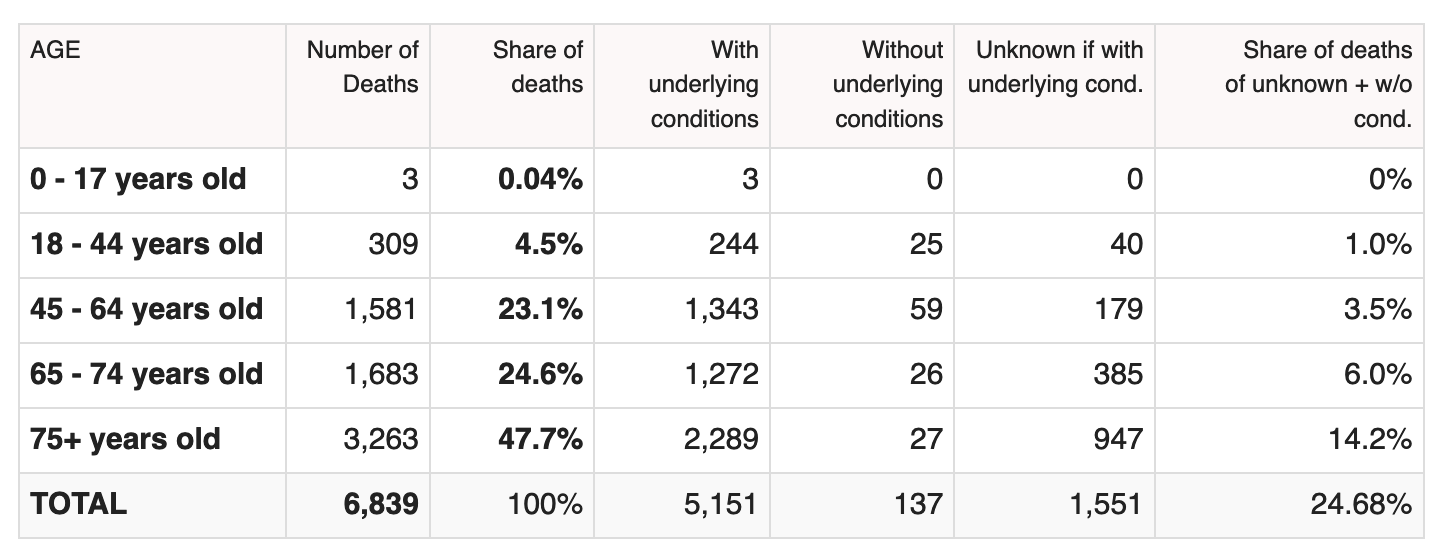

#### CDC Age Demographics for Covid-19 Deaths
##### through May 20, 2020 (based on slow reporting verified death reports--not latest)
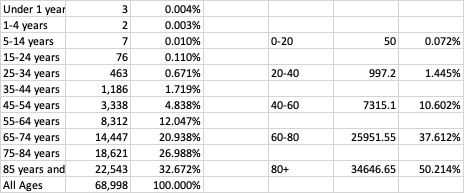

In [30]:
deadseries = series[locale][:cum][:,[map2series.dead]...]
n = size(deadseries,1)

180

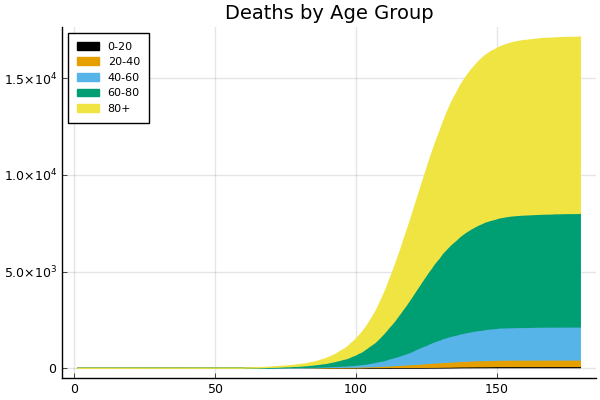

In [31]:
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
areaplot(1:n, deadseries[:,1:5],labels=ageserieslabels, title="Deaths by Age Group")

In [32]:
[deadseries[180,1:6] deadseries[180,1:6] ./ deadseries[180,6]]

6×2 Array{Float64,2}:
    61.0  0.00356267
   335.0  0.0195655
  1708.0  0.0997547
  5873.0  0.343009
  9145.0  0.534108
 17122.0  1.0

## Plots by Disease Condition

In [33]:
condseries = series[locale][:cum][:,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
n = size(condseries,1);

In [34]:
condlabels = ["nil", "mild", "sick", "severe"]
day = 180
condday = series[locale][:cum][day,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condend = series[locale][:cum][end,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condpct = round.(condday ./ sum(condday), digits=2)
println("Approximate Percentage Disease Condition\n(across all ages)")
condtbl = hcat(condlabels, condday, condpct)

Approximate Percentage Disease Condition
(across all ages)


4×3 Array{Any,2}:
 "nil"     121  0.25
 "mild"    236  0.49
 "sick"    101  0.21
 "severe"   22  0.05

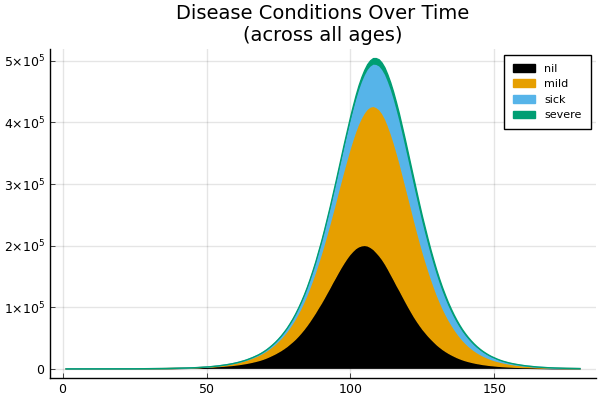

In [35]:
condserieslabels = [condlabels[1] condlabels[2] condlabels[3] condlabels[4]]
areaplot(1:n, condseries[:,:],labels=condserieslabels, 
    title="Disease Conditions Over Time\n(across all ages)")

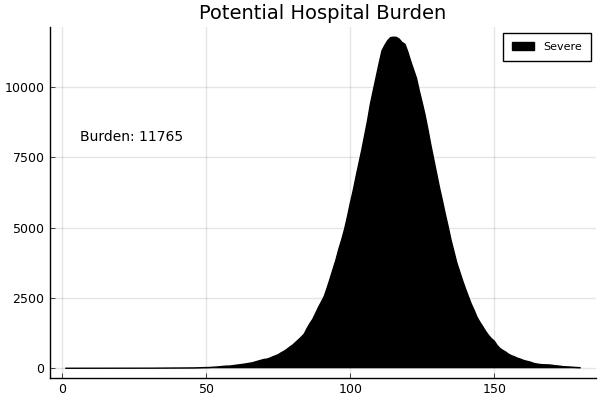

In [36]:
condserieslabels = [condlabels[4]]
areaplot(1:n, condseries[:,4],labels="Severe", title="Potential Hospital Burden")
maxsevere = maximum(condseries[:, 4])
half_yscale = floor(Int, maxsevere * 0.7)
annotate!((6,half_yscale,Plots.text("Burden: $maxsevere", 10, :left)))

### Check the Basic Identities

In [37]:
cumhistmx = alldict["dat"]["cumhistmx"]
newhistmx = alldict["dat"]["newhistmx"]
openmx = alldict["dat"]["openmx"];

In [38]:

summary = (
           total_infected = series[locale][:cum][1, 6] - series[locale][:cum][180,6],
           total_pop = series[locale][:cum][180,6] + series[locale][:cum][180,54],
           whos_left = series[locale][:cum][180,map2series.dead[6]] + series[locale][:cum][180,map2series.recovered[6]]
              + series[locale][:cum][180,map2series.infectious[6]] + series[locale][:cum][180,map2series.unexposed[6]],
           end_unexposed = series[locale][:cum][180,map2series.unexposed[6]],
           end_infected = series[locale][:cum][180,map2series.infectious[6]],
           end_recovered = series[locale][:cum][180,map2series.recovered[6]],
           end_dead = series[locale][:cum][180,map2series.dead[6]]
       )

(total_infected = 1435211, total_pop = 2252779, whos_left = 2252779, end_unexposed = 817562, end_infected = 480, end_recovered = 1417615, end_dead = 17122)

In [52]:
transeries = DataFrame(transq)
trans = (dead = sum(transeries[:,:dead]), recovered = sum(transeries[:,:recovered]))

(dead = 4401, recovered = 305740)

In [53]:
err = summary.total_infected - (trans.recovered + trans.dead + summary.end_infected)

-6

In [54]:
spreadseries = day2df(spreadq)
check_infected = sum(spreadseries[:,:infected])

375041

end_exposed is ok (off by 2 from age rounding and 6 seeds)
total infected is ok; matches check_infected

##### Some random documentation for me

In [55]:
plotattr()

Specify an attribute type to get a list of supported attributes. Options are Series, Subplot, Plot, Axis


In [56]:
plotattr(:Subplot)

Defined Subplot attributes are:
annotations, aspect_ratio, background_color_inside, background_color_legend, background_color_subplot, bottom_margin, camera, clims, color_palette, colorbar, colorbar_title, extra_kwargs, fontfamily_subplot, foreground_color_legend, foreground_color_subplot, foreground_color_title, framestyle, left_margin, legend, legendfontcolor, legendfontfamily, legendfonthalign, legendfontrotation, legendfontsize, legendfontvalign, legendtitle, legendtitlefontcolor, legendtitlefontfamily, legendtitlefonthalign, legendtitlefontrotation, legendtitlefontsize, legendtitlefontvalign, margin, projection, right_margin, subplot_index, title, titlefontcolor, titlefontfamily, titlefonthalign, titlefontrotation, titlefontsize, titlefontvalign, titlelocation, top_margin


In [57]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, match_dimensions, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror


In [58]:
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [59]:
plotattr("size")

size {NTuple{2,Int}}
windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)


In [60]:
plotattr(:Axis)

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen
